# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sma
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
rcParams['figure.figsize'] = 10,6
from sklearn.preprocessing import LabelEncoder

# Read Dataset

In [3]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Encoding

In [8]:
le=LabelEncoder()

le.fit(df['Fuel_Type'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
dictft=dict(enumerate(le.classes_))
print(dictft)

le.fit(df['Selling_type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
dictst=dict(enumerate(le.classes_))
print(dictst)

le.fit(df['Transmission'])
df['Transmission']=le.fit_transform(df['Transmission'])
dicttr=dict(enumerate(le.classes_))
print(dicttr)

le.fit(df['Car_Name'])
df['Car_Name']=le.fit_transform(df['Car_Name'])
dictcn=dict(enumerate(le.classes_))
print(dictcn)

df.head()

{0: 'CNG', 1: 'Diesel', 2: 'Petrol'}
{0: 'Dealer', 1: 'Individual'}
{0: 'Automatic', 1: 'Manual'}
{0: '800', 1: 'Activa 3g', 2: 'Activa 4g', 3: 'Bajaj  ct 100', 4: 'Bajaj Avenger 150', 5: 'Bajaj Avenger 150 street', 6: 'Bajaj Avenger 220', 7: 'Bajaj Avenger 220 dtsi', 8: 'Bajaj Avenger Street 220', 9: 'Bajaj Discover 100', 10: 'Bajaj Discover 125', 11: 'Bajaj Dominar 400', 12: 'Bajaj Pulsar  NS 200', 13: 'Bajaj Pulsar 135 LS', 14: 'Bajaj Pulsar 150', 15: 'Bajaj Pulsar 220 F', 16: 'Bajaj Pulsar NS 200', 17: 'Bajaj Pulsar RS200', 18: 'Hero  CBZ Xtreme', 19: 'Hero  Ignitor Disc', 20: 'Hero Extreme', 21: 'Hero Glamour', 22: 'Hero Honda CBZ extreme', 23: 'Hero Honda Passion Pro', 24: 'Hero Hunk', 25: 'Hero Passion Pro', 26: 'Hero Passion X pro', 27: 'Hero Splender Plus', 28: 'Hero Splender iSmart', 29: 'Hero Super Splendor', 30: 'Honda Activa 125', 31: 'Honda Activa 4G', 32: 'Honda CB Hornet 160R', 33: 'Honda CB Shine', 34: 'Honda CB Trigger', 35: 'Honda CB Unicorn', 36: 'Honda CB twister',

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [9]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [10]:
xc = sma.add_constant(x)

In [11]:
model = sma.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     263.4
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          1.07e-128
Time:                        14:17:50   Log-Likelihood:                -599.03
No. Observations:                 301   AIC:                             1216.
Df Residuals:                     292   BIC:                             1249.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -804.1424     88.167     -9.121      0.000    -977.665    -630.620
Car_Name         -0.0021      0.007     -0.284      0.776      -0.017       0.012
Year              0.4023      0.044      9.213      0.000       0.316       0.488
Present_Price     0.4462      0.016     27.784      0.000       0.415       0.478
Driven_kms    -6.487e-06    3.3e-06     -1.967      0.050    -1.3e-05    2.54e-09
Fuel_Type        -1.5051      0.283     -5.316      0.000      -2.062      -0.948
Selling_type     -1.1928      0.406     -2.935      0.004      -1.993      -0.393
Transmission     -1.4308      0.334     -4.287      0.000      -2.088      -0.774
Owner            -0.6776      0.431     -1.574      0.117      -1.525       0.170
==============================================================================
Omnibus:                       87.153   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.668
Skew:                           0.949   Prob(JB):                    3.45e-144
Kurtosis:                      10.006   Cond. No.                     4.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

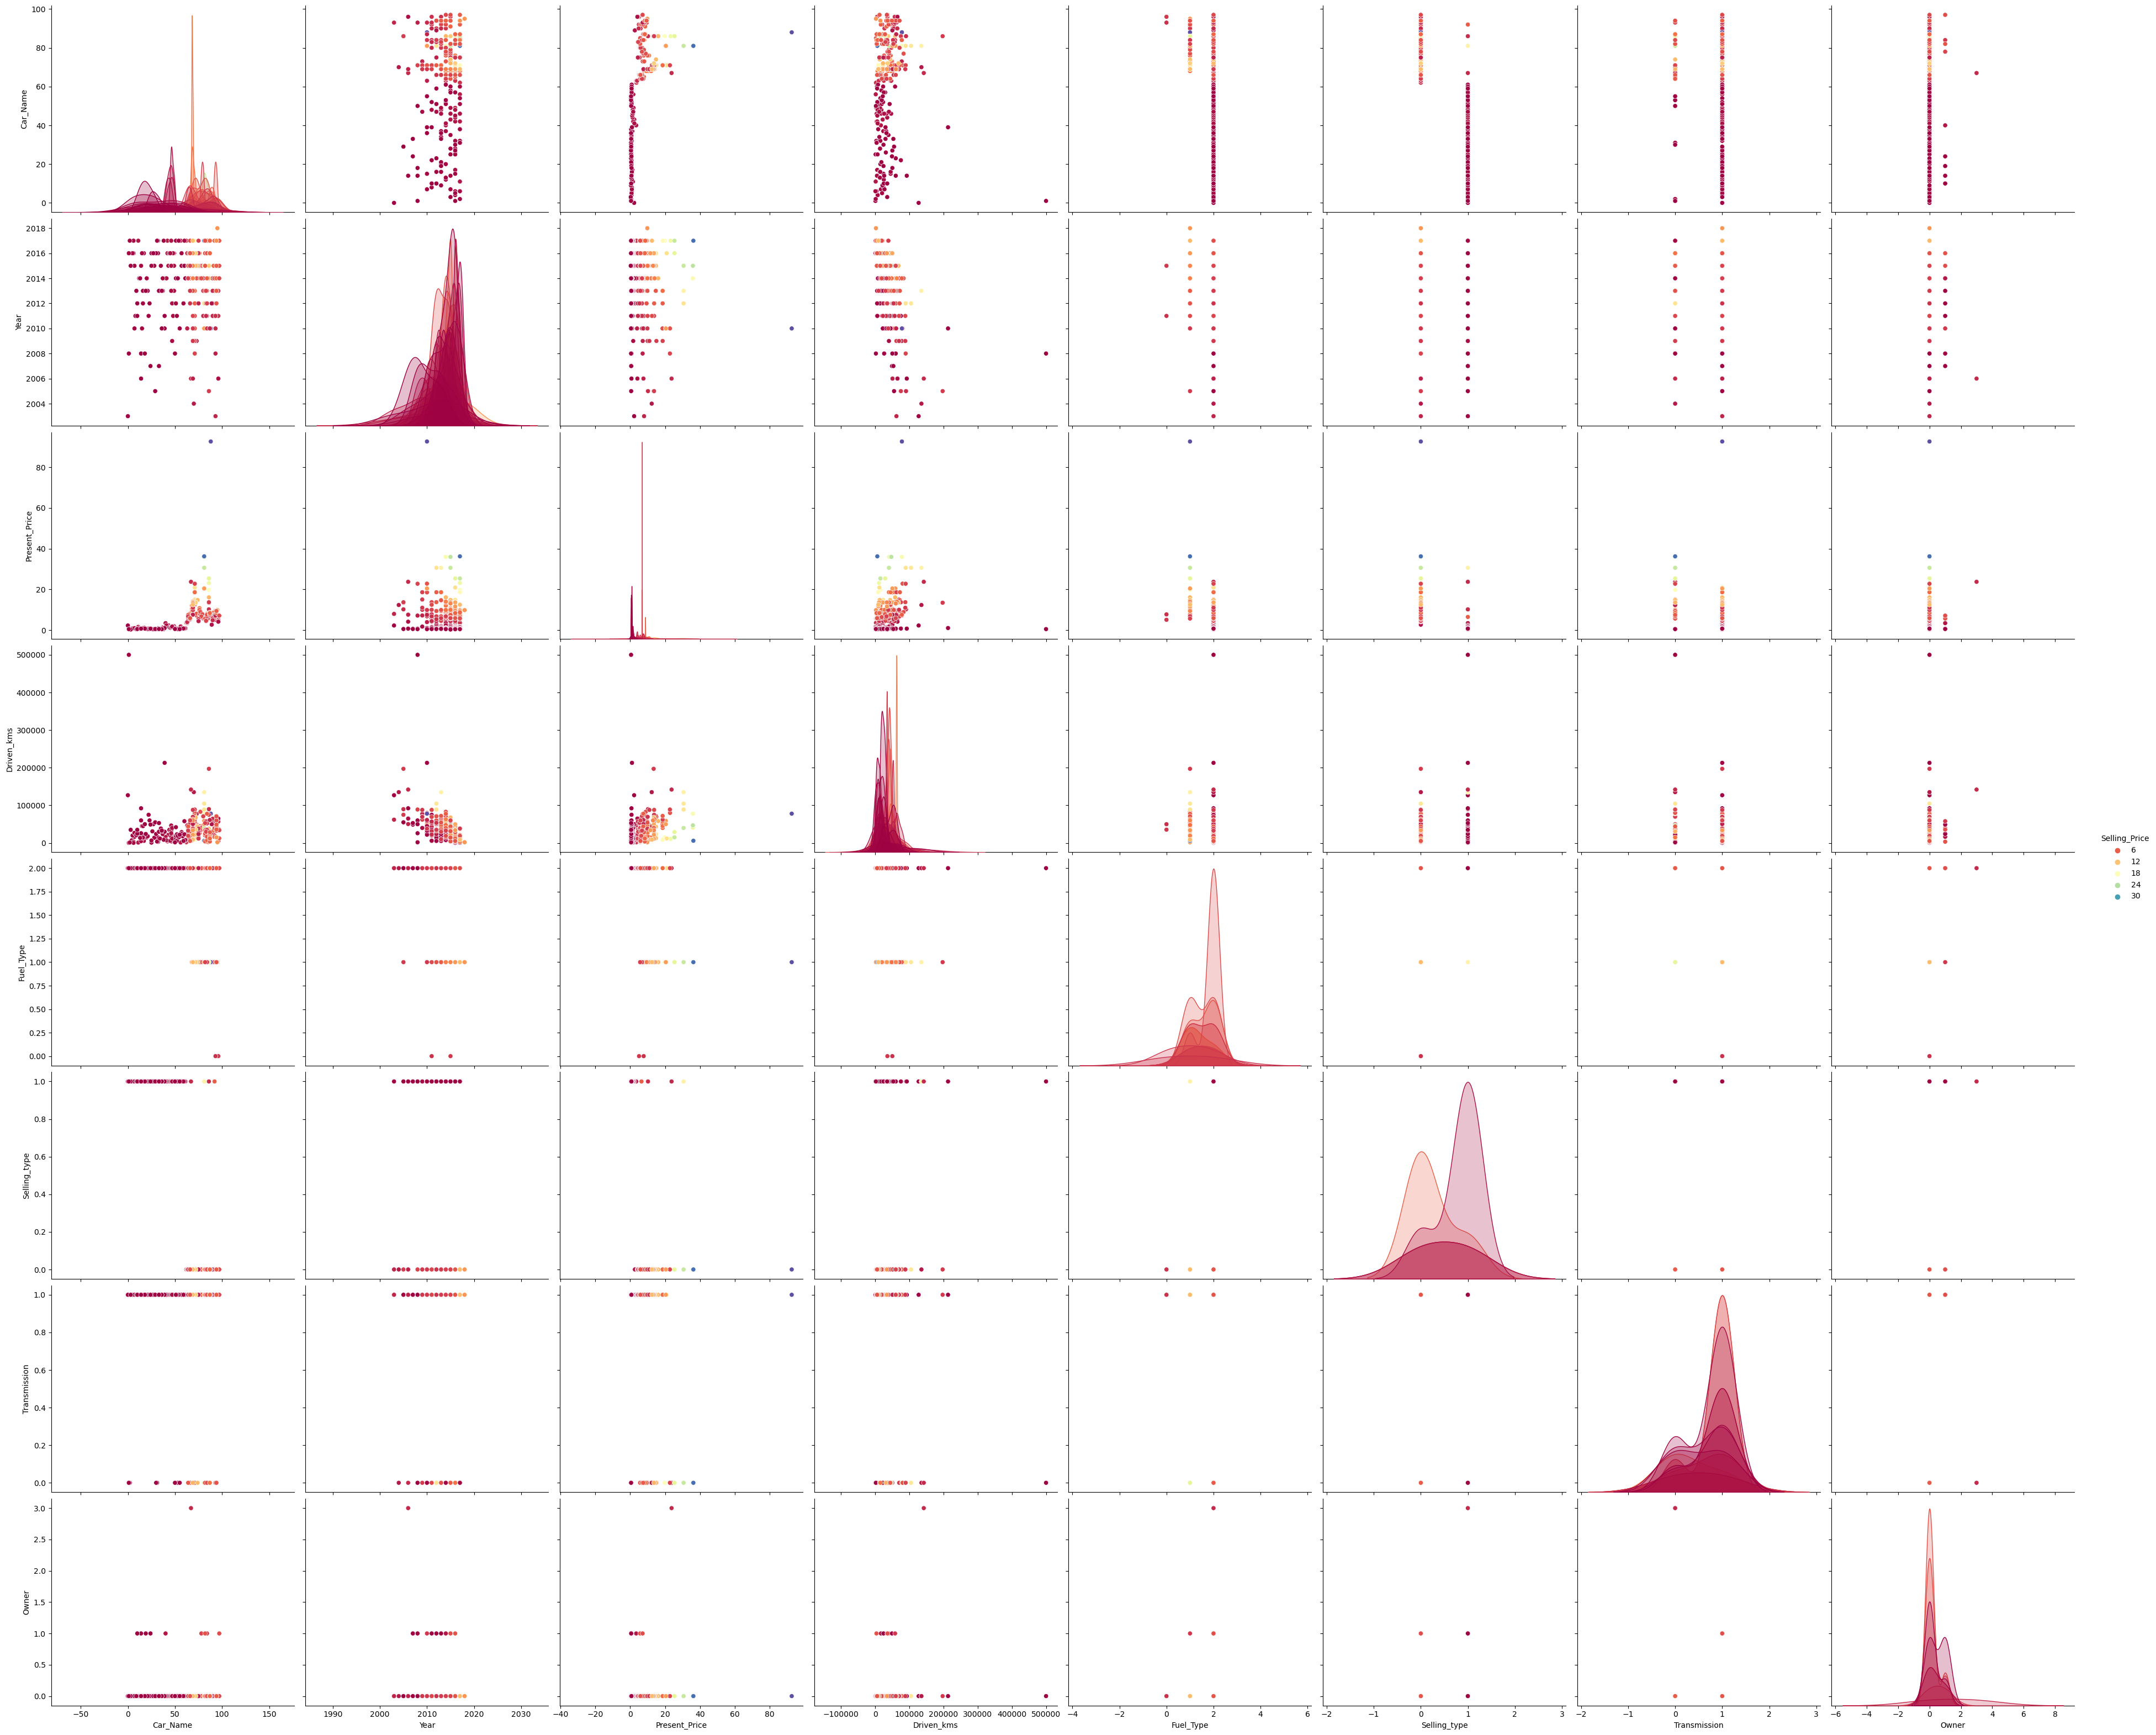

In [ ]:
sns.pairplot(df, hue = 'Selling_Price', height = 4, aspect = 1.2, palette = 'Spectral')

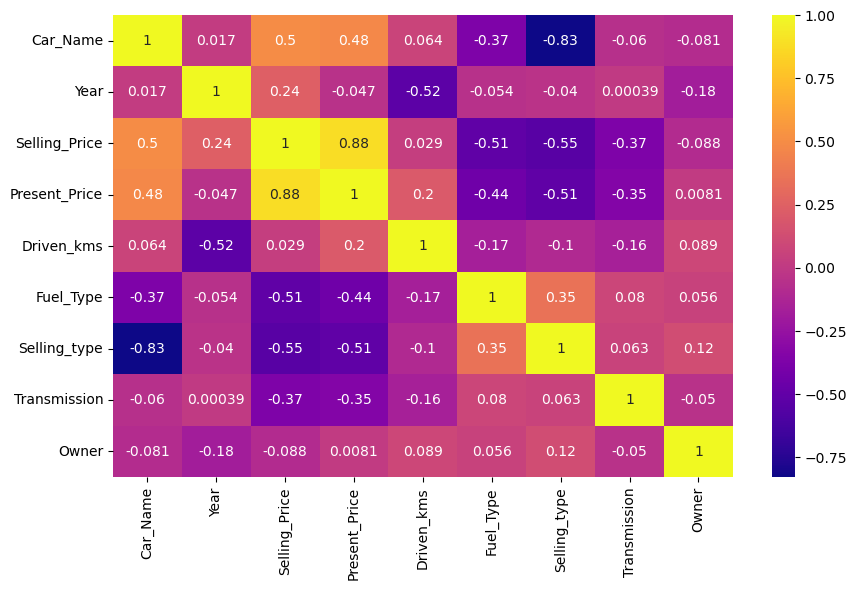

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

#  Variation inflation Factor

In [13]:
vf = [vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns,columns=['vif'])

,vif
const,724181.814045
Car_Name,3.335615
Year,1.480445
Present_Price,1.788810
Driven_kms,1.526397
Fuel_Type,1.349614
Selling_type,3.509742
Transmission,1.195998
Owner,1.057853


In [14]:
xc = xc.drop(columns=['Selling_type'],axis=1)

In [15]:
model = sma.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     292.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          4.17e-128
Time:                        14:20:03   Log-Likelihood:                -603.41
No. Observations:                 301   AIC:                             1223.
Df Residuals:                     293   BIC:                             1252.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -829.2672     88.883     -9.330      0.000   -1004.198    -654.336
Car_Name          0.0146      0.005      3.019      0.003       0.005       0.024
Year              0.4140      0.044      9.398      0.000       0.327       0.501
Present_Price     0.4574      0.016     28.942      0.000       0.426       0.488
Driven_kms    -5.536e-06   3.32e-06     -1.666      0.097   -1.21e-05       1e-06
Fuel_Type        -1.4877      0.287     -5.188      0.000      -2.052      -0.923
Transmission     -1.3519      0.337     -4.012      0.000      -2.015      -0.689
Owner            -0.8120      0.434     -1.873      0.062      -1.665       0.041
==============================================================================
Omnibus:                       77.934   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.420
Skew:                           0.810   Prob(JB):                    1.13e-130
Kurtosis:                       9.715   Cond. No.                     4.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2,random_state=100)

In [22]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(240, 8)
(61, 8)
(240,)
(61,)


In [23]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [24]:
lr.coef_

array([ 7.05068301e-04,  4.01005412e-01,  4.15813326e-01, -4.42582742e-06,
       -1.75045543e+00, -1.19048969e+00, -1.54774949e+00,  6.00095762e-01])

In [25]:
lr.intercept_

-800.9948774513292

In [26]:
y_pred_test = lr.predict(xtest)
r2_test = r2_score(ytest,y_pred_test)
r2_test

0.7777927152621482

In [27]:
y_pred_train = lr.predict(xtrain)
r2_train = r2_score(ytrain,y_pred_train)
r2_train

0.8967630244300642

In [28]:
print('Training R2 :', lr.score(xtrain,ytrain))
print('Test R2:', lr.score(xtest,ytest))

Training R2 : 0.8967630244300642
Test R2: 0.7777927152621482


In [29]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)

r2_train = r2_score(ytrain,y_pred_train)
r2_test = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr = [r2_train,r2_test,train_rmse,test_rmse]
res_lr

[0.8967630244300642, 0.7777927152621482, 1.630417393327971, 2.3912430652469365]

 # Backward elimination method

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [31]:
lr_back = sfs(estimator= lr, k_features='best',scoring='r2',forward = False)
sfs_back = lr_back.fit(xtrain,ytrain)
features_back = list(sfs_back.k_feature_names_)
features_back

['Car_Name', 'Year', 'Present_Price', 'Fuel_Type']

In [32]:
# Backward elimination method

lr = LinearRegression()
lr.fit(xtrain[features_back],ytrain)

y_pred_train = lr.predict(xtrain[features_back])
y_pred_test = lr.predict(xtest[features_back])

r2_train = r2_score(ytrain,y_pred_train)
r2_test = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr_back = [r2_train,r2_test,train_rmse,test_rmse]
res_lr_back

[0.8834829041435572, 0.7888888089207784, 1.7321120738589326, 2.330774217069815]

In [33]:
results = pd.DataFrame()

In [34]:
results['Full Model'] = res_lr
results['Backward Elimination'] = res_lr_back

In [35]:
results.index = ['R2 Train','R2 Test', 'RMSE Train','RMSE Test']

In [36]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.896763,0.777793,1.630417,2.391243
Backward Elimination,0.883483,0.788889,1.732112,2.330774


# Forward elimination

In [37]:
lr_forw = sfs(estimator= lr, k_features='best',scoring='r2',forward = True)
sfs_forw = lr_forw.fit(xtrain,ytrain)
features_forw = list(sfs_forw.k_feature_names_)
features_forw

['Year', 'Present_Price', 'Fuel_Type', 'Selling_type']

In [38]:
lr = LinearRegression()
lr.fit(xtrain[features_forw],ytrain)

y_pred_train = lr.predict(xtrain[features_forw])
y_pred_test = lr.predict(xtest[features_forw])

r2_train = r2_score(ytrain,y_pred_train)
r2_test = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr_forw = [r2_train,r2_test,train_rmse,test_rmse]
res_lr_forw

[0.8862076877396349, 0.7930693566918027, 1.7117393104874918, 2.307581142370179]

In [39]:
results['Forward Elimination'] = res_lr_forw

In [40]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.896763,0.777793,1.630417,2.391243
Backward Elimination,0.883483,0.788889,1.732112,2.330774
Forward Elimination,0.886208,0.793069,1.711739,2.307581


# RFE

In [41]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator = lr)
rfe_model = rfe.fit(xtrain,ytrain)

In [42]:
rfe_model.ranking_

array([4, 2, 3, 5, 1, 1, 1, 1])

In [43]:
xtrain.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [44]:
rank_df = pd.DataFrame()
rank_df['Feature'] = x.columns
rank_df['Rank'] = rfe_model.ranking_
feature_rank = rank_df[rank_df['Rank']==1]['Feature']
feature_rank

4       Fuel_Type
5    Selling_type
6    Transmission
7           Owner
Name: Feature, dtype: object

In [45]:
lr = LinearRegression()
lr.fit(xtrain[feature_rank],ytrain)

y_pred_train = lr.predict(xtrain[feature_rank])
y_pred_test = lr.predict(xtest[feature_rank])

r2_train = r2_score(ytrain,y_pred_train)
r2_test = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr_rfe = [r2_train,r2_test,train_rmse,test_rmse]
res_lr_rfe

[0.5581576382710702, 0.3267502870095492, 3.3729883336213122, 4.162293164137377]

In [46]:
results['RFE'] = res_lr_rfe

In [47]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.896763,0.777793,1.630417,2.391243
Backward Elimination,0.883483,0.788889,1.732112,2.330774
Forward Elimination,0.886208,0.793069,1.711739,2.307581
RFE,0.558158,0.326750,3.372988,4.162293


# Ridge & Lasso Model

In [53]:
from sklearn.linear_model import Ridge,Lasso

In [54]:
ridge_model = Ridge(alpha = 0.5)
ridge_model.fit(xtrain,ytrain)
ridge_model

Ridge(alpha=0.5)

In [55]:
y_pred_train = ridge_model.predict(xtrain)
y_pred_test = ridge_model.predict(xtest)

r2_train = r2_score(ytrain,y_pred_train)
r2_test = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_ridge = [r2_train,r2_test,train_rmse,test_rmse]
res_ridge

[0.896748904864656, 0.7793221351734565, 1.6305288843796262, 2.382999569699822]

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param = {'alpha':[0.2,0.5,0.4,0.1]}

r = Ridge()

rcv = GridSearchCV(r,param,cv = 5, scoring= 'r2')
rcv.fit(xtrain,ytrain)

rcv.best_params_

{'alpha': 0.5}

In [58]:
rcv.best_score_

0.8269679320005455

In [59]:
results['Ridge'] = res_ridge

In [60]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.896763,0.777793,1.630417,2.391243
Backward Elimination,0.883483,0.788889,1.732112,2.330774
Forward Elimination,0.886208,0.793069,1.711739,2.307581
RFE,0.558158,0.326750,3.372988,4.162293
Ridge,0.896749,0.779322,1.630529,2.383000


In [61]:
param = {'alpha':[0.01,0.02,0.2,0,0.4,0.1]}

l = Lasso()

lcv = GridSearchCV(l,param,cv = 5, scoring= 'r2')
lcv.fit(xtrain,ytrain)

lcv.best_params_

{'alpha': 0.01}

In [62]:
Lasso_model = Lasso(alpha = 0.01)
Lasso_model.fit(xtrain,ytrain)
Lasso_model

Lasso(alpha=0.01)

In [63]:
y_pred_train = Lasso_model.predict(xtrain)
y_pred_test = Lasso_model.predict(xtest)

r2_train = r2_score(ytrain,y_pred_train)
r2_test = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lasso = [r2_train,r2_test,train_rmse,test_rmse]
res_lasso

[0.8964963456963881,
 0.7874727522827547,
 1.6325218584014471,
 2.3385781428568864]

In [64]:
lcv.best_score_

0.8263663276626371

In [65]:
results['Lasso'] = res_lasso

In [66]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.896763,0.777793,1.630417,2.391243
Backward Elimination,0.883483,0.788889,1.732112,2.330774
Forward Elimination,0.886208,0.793069,1.711739,2.307581
RFE,0.558158,0.326750,3.372988,4.162293
Ridge,0.896749,0.779322,1.630529,2.383000
Lasso,0.896496,0.787473,1.632522,2.338578
